## Market Data Sandbox

**Context:** Use this notebook for experimenting with data source APIs to build up starter code before implementing methods in the source code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance
from alpha_vantage.timeseries import TimeSeries

In [2]:
# API Keys - delete before pushing to GitHub
apikeys = {
    'alpha_vantage': 'GCO76QJAV6LEHGTE'
}

### Equities

**Source:** [AlphaVantage](https://www.alphavantage.co/)  
**Highest Frequency:** `1min`  
**Format:** `json`, `csv`, or `pandas`  
**Adjusted:** by default `adjusted=true` and data are adjusted by historical split and divident events
**Lookback:** 1-2 months, or Extended history, trailing 2 years (Daily and lower frequency are available for last 20+ years)

In [3]:
# get some data
ts = TimeSeries(
    key=apikeys['alpha_vantage'],
    output_format='json'
)

**NOTE:** AlphaVantage intraday extended data does not appear to be working. While it is unclear for now if the issue is user error or a problem with the AV API - I will come back to this later.

Error Message:
```
JSONDecodeError: Expecting value: line 1 column 1 (char 0)
```

Strategies which require intraday data can (and should) be backtested in a more robust backtesting engine (ie QuantConnect)

In [4]:
sym = 'SPY'
data, meta = ts.get_daily(symbol='SPY')

In [5]:
df = pd.DataFrame(data).T.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index)
df.rename(
    columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    },
    inplace=True
)
df.sort_index(ascending=True, inplace=True)

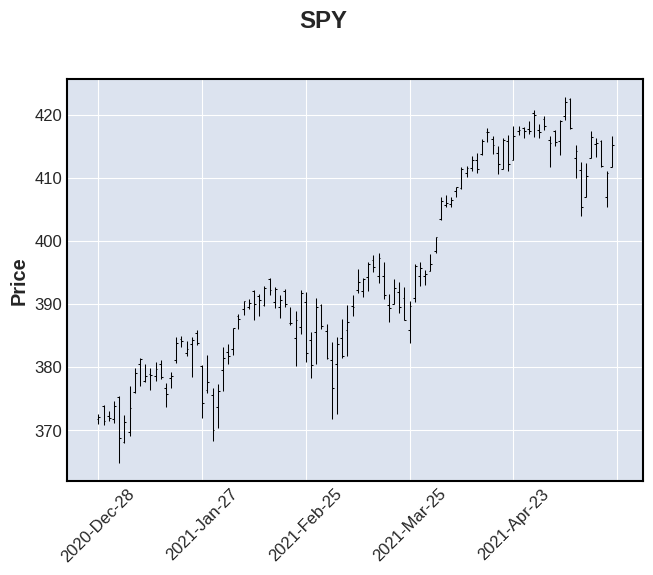

In [7]:
mplfinance.plot(df, title='SPY')

**Source:** [IEX Cloud](https://iexcloud.io/)  
**Highest Frequency:** `1min`  
**Format:** `json` 
**Adjusted:** json file includes both
**Lookback:** Extended history back to 2007